# Spam detection filter

### ‘Spam detection’ in SMS is an application of document classification. In this application, a text message is classified as either spam or non-spam (i.e. ham).
### The dataset I will be using for this project is ‘SMS spam Collection Dataset’. This dataset contains set of SMS tagged messages that have been collected for SMS spam research. It has total 5574 messages in English, tagged as ham or spam.


In [18]:
import pandas as pd
sms_data = pd.read_csv("SMSSpamCollection", sep ="\t", names = ["label", "message"])

In [19]:
sms_data.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### EDA

In [21]:
sms_data.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

### Let's find length of the ham and spam texts

In [22]:
sms_data["message_length"] = sms_data["message"].apply(len)

In [23]:
sms_data.head(5)

,label,message,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
sms_data.message_length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: message_length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFCD5ABBE0>,
      dtype=object)

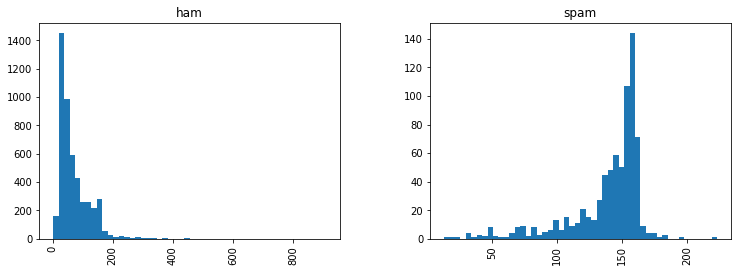

In [32]:
#Let's see destribution of ham and spam messages
sms_data.hist(column = "message_length", by = "label", bins = 50, figsize = (12, 4))

### Looks like spam message length is generally bigger than that of ham message length

## Pre-processing

### Steps followed in pre-processing:
    1. Normalizing case
    2. Removing punctuation
    3. Removing stopwords
    4. Stemming

In [42]:
#Removing stopwards and punctuation
import string
from nltk.corpus import stopwords
from nltk import stem
stemmer = stem.SnowballStemmer('english')

In [43]:
def pre_process(txt):
    #Lower case
    txt = txt.lower()
    
    #Check the characters other than punctuation marks and join them seperately
    np_char = [char for char in txt if char not in string.punctuation]
    np_char = "".join(np_char)
    
    #Remove stopwords
    msg = [word for word in np_char.split() if word.lower() not in stopwords.words ("english")]
    
    msg = " ".join([stemmer.stem(word) for word in msg])
    return msg

In [44]:
sms_data["message"].head(5).apply(pre_process)

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkts 2...
3                  u dun say earli hor u c alreadi say
4            nah dont think goe usf live around though
Name: message, dtype: object

### Train test split


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sms_data['message'], sms_data['label'], test_size = 0.1, random_state = 1)

### Vectorizing using TF-IDF

In [47]:
# training the vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

### Building and Testing the Classifier

In [48]:
from sklearn import svm
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

C:\Users\Darshana\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Evaluating the model

In [49]:
#Confusion metrics
from sklearn.metrics import confusion_matrix
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[487   2]
 [  7  62]]


### Out of 489 instances the classifier predicted 487 sms as ham correctly and only 2 are identified as spam
### Out of 69 spam messages 62 were identified as spam correctly. 


In [57]:
#Accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9838709677419355


In [58]:
#Utility function to identify if the message is ham or spam
def pred(msg):
    msg = vectorizer.transform([msg])
    prediction = svm.predict(msg)
    return prediction[0]

In [54]:
pred("Good to see you")

'ham'

In [56]:
pred("Congratulations! you have won 70 million cash prize")

'spam'